In [183]:
import seaborn as sns
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np
import time
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colorbar, colors
import matplotlib.cm as cmx

In [272]:
class nlcmap(LinearSegmentedColormap):
    """A nonlinear colormap"""

    name = 'nlcmap'

    def __init__(self, cmap, levels):
        self.cmap = cmap
        self.monochrome = self.cmap.monochrome
        self.levels = asarray(levels, dtype='float64')
        self._x = self.levels/ self.levels.max()
        self.levmax = self.levels.max()
        self.levmin = self.levels.min()
        self._y = linspace(self.levmin, self.levmax, len(self.levels))

    def __call__(self, xi, alpha=1.0, **kw):
        yi = interp(xi, self._x, self._y)
        return self.cmap(yi/self.levmax, alpha)
# Defines the colormap using levels and builtin colormap
levelss = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
levels = [x * 3 for x in levelss]# Normalize the value
cmap_lin = cm.jet_r
cmap_nonlin = nlcmap(cmap_lin, levels)

viscm not found, falling back on simple display


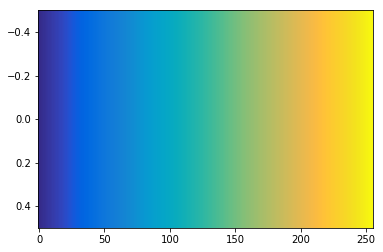

In [116]:
# Parula colormap looks like in MATLAB
cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)
test_cm = parula_map

if __name__ == "__main__":
    import matplotlib.pyplot as plt
    import numpy as np

    try:
        from viscm import viscm
        viscm(parula_map)
    except ImportError:
        print("viscm not found, falling back on simple display")
        plt.imshow(np.linspace(0, 100, 256)[None, :], aspect='auto',
                   cmap=parula_map)
    plt.show()

In [280]:
# To use the colormap 'ssec' of ncview in python
cmap_ssec = [
      0,0,45, 0,1,46, 0,2,47, 0,3,48, 0,5,49, 0,6,50, 0,7,51, 0,9,52, 
      0,10,53, 0,11,54, 0,13,55, 0,14,56, 0,15,57, 0,17,58, 0,18,59, 0,19,60, 
      0,21,62, 0,22,63, 0,23,64, 0,25,65, 0,26,66, 0,27,67, 0,29,68, 0,30,69, 
      0,31,70, 0,33,71, 0,34,72, 0,35,73, 0,37,74, 0,38,75, 0,39,76, 0,40,77, 
      0,42,79, 0,43,80, 0,44,81, 0,46,82, 0,47,83, 0,48,84, 0,50,85, 0,51,86, 
      0,52,87, 0,54,88, 0,55,89, 0,56,90, 0,58,91, 0,59,92, 0,60,93, 0,62,94, 
      0,63,96, 0,64,97, 0,66,98, 0,67,99, 0,68,100, 0,70,101, 0,71,102, 0,72,103, 
      0,74,104, 0,75,105, 0,76,106, 0,77,107, 0,79,108, 0,80,109, 0,81,110, 0,83,111, 
      0,84,113, 0,85,114, 0,87,115, 0,88,116, 0,89,117, 0,91,118, 0,92,119, 0,93,120, 
      0,95,121, 0,96,122, 0,97,123, 0,99,124, 0,100,125, 0,101,126, 0,103,127, 0,104,128, 
      0,105,130, 0,107,131, 0,108,132, 0,109,133, 0,111,134, 0,112,135, 0,113,136, 0,114,137, 
      0,116,138, 0,117,139, 0,118,140, 0,120,141, 0,121,142, 0,122,143, 0,124,144, 0,125,145, 
      0,126,147, 0,128,148, 0,129,149, 0,130,150, 0,132,151, 0,133,152, 0,134,153, 0,136,154, 
      0,137,155, 0,138,156, 0,140,157, 0,141,158, 0,142,159, 0,144,160, 0,145,161, 0,146,162, 
      0,148,164, 0,149,165, 0,150,166, 0,151,167, 0,153,168, 0,154,169, 0,155,170, 0,157,171, 
      0,158,172, 0,159,173, 0,161,174, 0,162,175, 0,163,176, 0,165,177, 0,166,178, 0,167,180, 
      0,169,181, 0,170,182, 0,171,183, 0,173,184, 0,174,185, 0,175,186, 0,177,187, 0,178,188, 
      0,179,189, 0,181,190, 0,182,191, 0,183,192, 0,185,193, 0,186,194, 0,187,195, 0,188,197, 
      0,190,198, 0,191,199, 0,192,200, 0,194,201, 0,195,202, 0,196,203, 0,198,204, 0,199,205, 
      0,200,206, 0,202,207, 0,203,208, 0,204,209, 0,206,210, 0,207,211, 0,208,212, 0,210,214, 
      0,211,215, 0,212,216, 0,214,217, 0,215,218, 0,216,219, 0,218,220, 0,219,221, 0,220,222, 
      0,222,223, 0,223,224, 0,224,225, 0,225,226, 0,227,227, 0,228,228, 0,229,229, 8,230,222, 
      17,231,214, 26,232,206, 34,233,198, 43,234,190, 52,235,182, 61,236,174, 70,236,166, 78,237,158, 
      87,238,150, 96,239,143, 105,240,135, 114,241,127, 122,242,119, 131,242,111, 140,243,103, 149,244,95, 
      157,245,87, 166,246,79, 175,247,71, 184,248,63, 193,248,55, 201,249,47, 210,250,39, 219,251,32, 
      228,252,24, 237,253,16, 245,254,8, 254,254,0, 255,250,0, 255,245,0, 255,240,0, 255,236,0, 
      255,231,0, 255,226,0, 255,221,0, 255,217,0, 255,212,0, 255,207,0, 255,202,0, 255,198,0, 
      255,193,0, 255,188,0, 255,183,0, 255,179,0, 255,174,0, 255,169,0, 255,164,0, 255,160,0, 
      255,155,0, 255,150,0, 255,145,0, 255,141,0, 255,136,0, 255,131,0, 255,126,0, 255,122,0, 
      253,117,0, 249,113,0, 246,109,0, 242,105,0, 239,101,0, 236,97,0, 232,93,0, 229,89,0, 
      225,85,0, 222,81,0, 219,77,0, 215,73,0, 212,69,0, 208,65,0, 205,61,0, 202,57,0, 
      198,53,0, 195,49,0, 191,45,0, 188,41,0, 185,37,0, 181,33,0, 178,29,0, 175,24,0]; # codes from ncview

In [371]:
lrange = np.linspace(0,1,256) # First column indicate the normalized values in the colormap
lred = []
lgreen = []
lblue = []
i=0
# Loop over the whole array and get RGB values for individual array
while i < size(cmap_ssec):
    lred.append(cmap_ssec[i])
    lgreen.append(cmap_ssec[i+1])
    lblue.append(cmap_ssec[i+2])
    i=i+3
lred = [x / 256 for x in lred]# Normalize the value
lgreen = [x / 256 for x in lgreen]# Normalize the value
lblue = [x / 256 for x in lblue]# Normalize the value

llred = ()
llgreen = ()
llblue = ()
i=0
# Assemble the array in the 'cdict' convention
while i < size(lrange):
    llred = llred + ((lrange[i],lred[i],lred[i]),)
    llgreen = llgreen + ((lrange[i],lgreen[i],lgreen[i]),)
    llblue = llblue + ((lrange[i],lblue[i],lblue[i]),)
    i = i + 1
# Make the cdict
cdict ={'red':llred,'green':llgreen,'blue':llblue}
ssec = LinearSegmentedColormap('ssec', cdict)

In [135]:
DATA = Dataset('fielddump.000.000.002.nc')

In [136]:
ql=DATA.variables['ql'][:]
w=DATA.variables['w'][:]
SBL=DATA.variables['sc001'][:]
SFT=DATA.variables['sc002'][:]
z=DATA.variables['zt'][:]
# Read the variables.
x=np.linspace(0,4480,np.shape(ql)[3])


In [120]:
np.shape(ql)# Time,z,y,x

(124, 200, 16, 128)

In [121]:
xx,zz=np.meshgrid(x,z)

In [123]:
# Make a custom colormap to show the profile 'correctly'

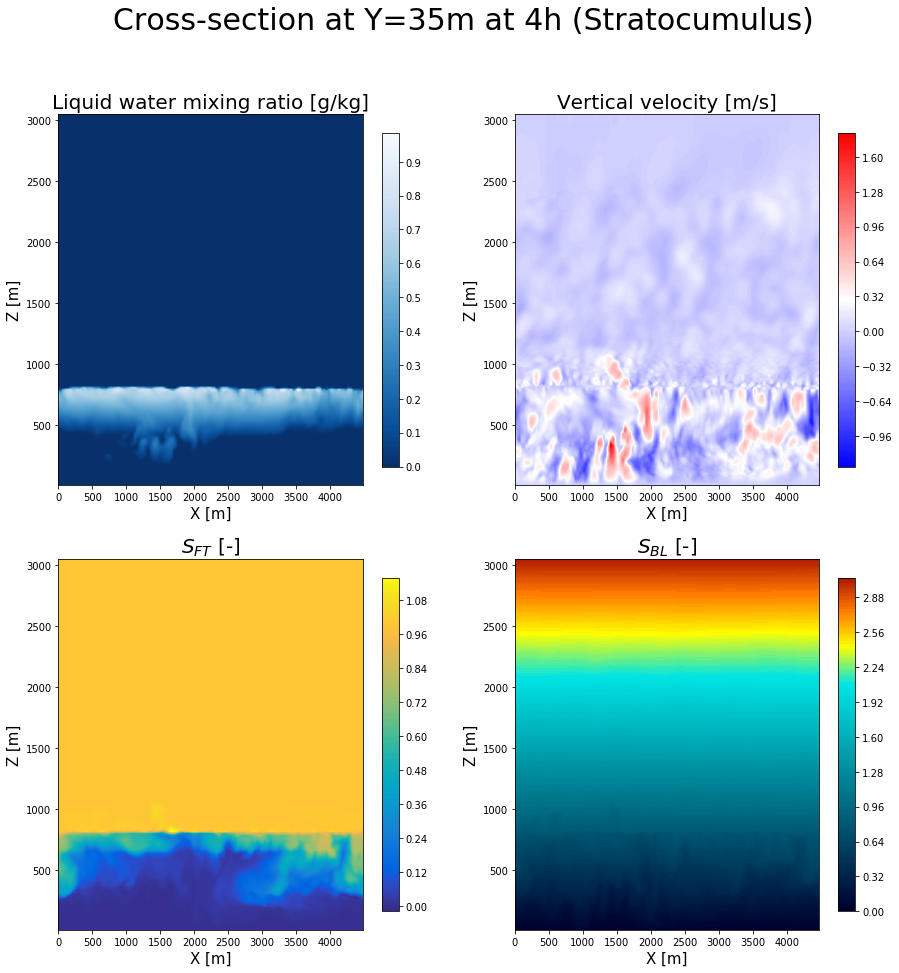

In [385]:
i=24 ## One layer structure
fig, axs = plt.subplots(2, 2,figsize=(15,15))
fig.suptitle('Cross-section at Y=35m at 4h (Stratocumulus)',fontsize=30)
ax = plt.subplot(221)
cs = plt.contourf(xx,zz,ql[i,:,0,:]*1e3,200,cmap='Blues_r')
plt.title('Liquid water mixing ratio [g/kg]',fontsize=20)
plt.xlabel('X [m]',fontsize=15)
plt.ylabel('Z [m]',fontsize=15)
fig.colorbar(cs, ax=ax, shrink=0.9)

ax = plt.subplot(222)
cs = plt.contourf(xx,zz,w[i,:,0,:],200,cmap='bwr')
plt.title('Vertical velocity [m/s]',fontsize=20)
plt.xlabel('X [m]',fontsize=15)
plt.ylabel('Z [m]',fontsize=15)
fig.colorbar(cs, ax=ax, shrink=0.9)

ax=plt.subplot(223)
cs = plt.contourf(xx,zz,SFT[i,:,0,:],200,cmap=parula_map)
plt.title('$S_{FT}$ [-]',fontsize=20)
plt.xlabel('X [m]',fontsize=15)
plt.ylabel('Z [m]',fontsize=15)
fig.colorbar(cs, ax=ax, shrink=0.9)

ax=plt.subplot(224)
cs = ax.contourf(xx,zz,SBL[i,:,0,:],200, cmap=ssec)
plt.title('$S_{BL}$ [-]',fontsize=20)
plt.xlabel('X [m]',fontsize=15)
plt.ylabel('Z [m]',fontsize=15)
fig.colorbar(cs, ax=ax, shrink=0.9)

plt.savefig('1.eps')

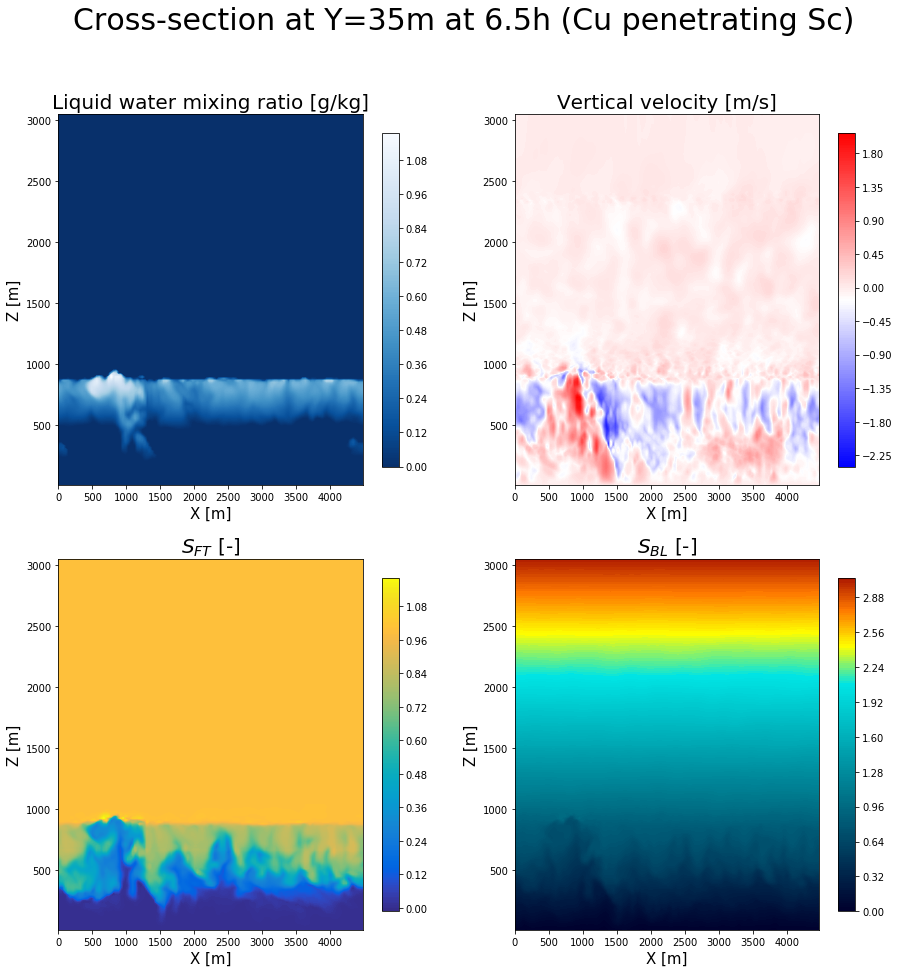

In [386]:
i=38 ## two-layer structure ED-Triple-MF scheme applied.
fig, axs = plt.subplots(2, 2,figsize=(15,15))
fig.suptitle('Cross-section at Y=35m at 6.5h (Cu penetrating Sc)',fontsize=30)
ax = plt.subplot(221)
cs = plt.contourf(xx,zz,ql[i,:,0,:]*1e3,200,cmap='Blues_r')
plt.title('Liquid water mixing ratio [g/kg]',fontsize=20)
plt.xlabel('X [m]',fontsize=15)
plt.ylabel('Z [m]',fontsize=15)
fig.colorbar(cs, ax=ax, shrink=0.9)

ax = plt.subplot(222)
cs = plt.contourf(xx,zz,w[i,:,0,:],200,cmap='bwr')
plt.title('Vertical velocity [m/s]',fontsize=20)
plt.xlabel('X [m]',fontsize=15)
plt.ylabel('Z [m]',fontsize=15)
fig.colorbar(cs, ax=ax, shrink=0.9)

ax=plt.subplot(223)
cs = plt.contourf(xx,zz,SFT[i,:,0,:],200,cmap=parula_map)
plt.title('$S_{FT}$ [-]',fontsize=20)
plt.xlabel('X [m]',fontsize=15)
plt.ylabel('Z [m]',fontsize=15)
fig.colorbar(cs, ax=ax, shrink=0.9)

ax=plt.subplot(224)
cs = ax.contourf(xx,zz,SBL[i,:,0,:],200, cmap=ssec)
plt.title('$S_{BL}$ [-]',fontsize=20)
plt.xlabel('X [m]',fontsize=15)
plt.ylabel('Z [m]',fontsize=15)
fig.colorbar(cs, ax=ax, shrink=0.9)

plt.savefig('2.eps')

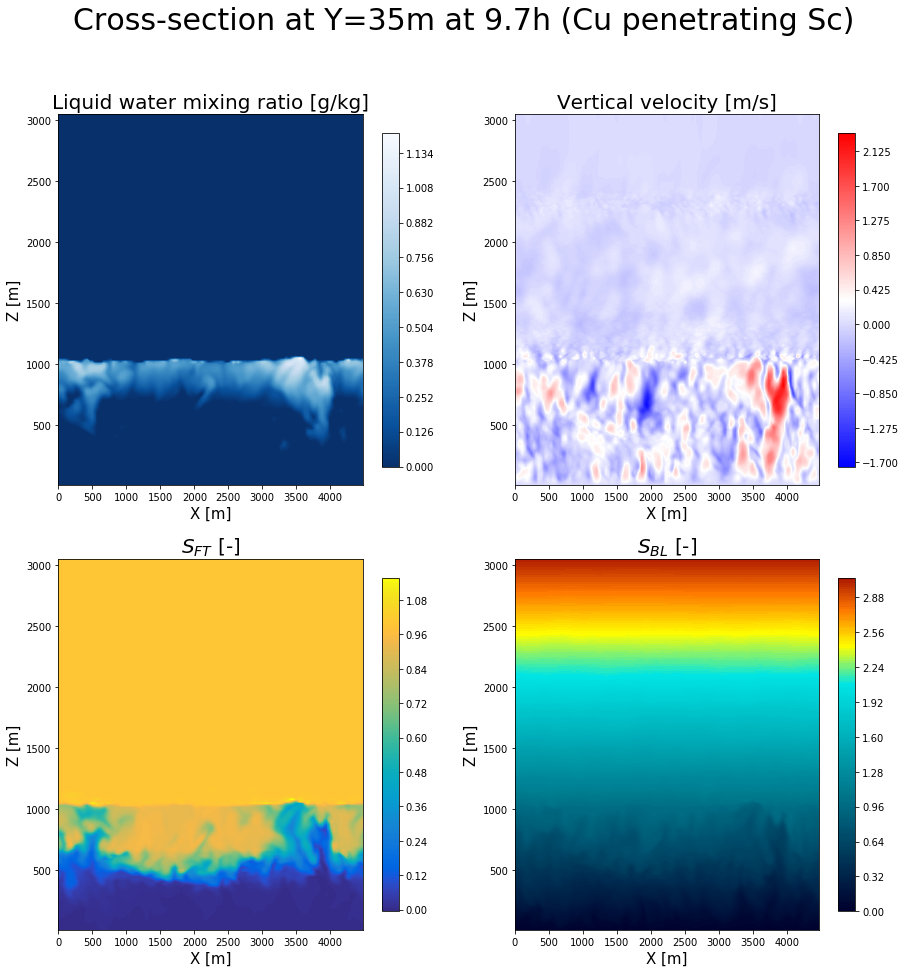

In [387]:
i=58 ## two-layer structure ED-Triple-MF scheme applied.
fig, axs = plt.subplots(2, 2,figsize=(15,15))
fig.suptitle('Cross-section at Y=35m at 9.7h (Cu penetrating Sc)',fontsize=30)
ax = plt.subplot(221)
cs = plt.contourf(xx,zz,ql[i,:,0,:]*1e3,200,cmap='Blues_r')
plt.title('Liquid water mixing ratio [g/kg]',fontsize=20)
plt.xlabel('X [m]',fontsize=15)
plt.ylabel('Z [m]',fontsize=15)
fig.colorbar(cs, ax=ax, shrink=0.9)

ax = plt.subplot(222)
cs = plt.contourf(xx,zz,w[i,:,0,:],200,cmap='bwr')
plt.title('Vertical velocity [m/s]',fontsize=20)
plt.xlabel('X [m]',fontsize=15)
plt.ylabel('Z [m]',fontsize=15)
fig.colorbar(cs, ax=ax, shrink=0.9)

ax=plt.subplot(223)
cs = plt.contourf(xx,zz,SFT[i,:,0,:],200,cmap=parula_map)
plt.title('$S_{FT}$ [-]',fontsize=20)
plt.xlabel('X [m]',fontsize=15)
plt.ylabel('Z [m]',fontsize=15)
fig.colorbar(cs, ax=ax, shrink=0.9)

ax=plt.subplot(224)
cs = ax.contourf(xx,zz,SBL[i,:,0,:],200, cmap=ssec)
plt.title('$S_{BL}$ [-]',fontsize=20)
plt.xlabel('X [m]',fontsize=15)
plt.ylabel('Z [m]',fontsize=15)
fig.colorbar(cs, ax=ax, shrink=0.9)

plt.savefig('3.eps')

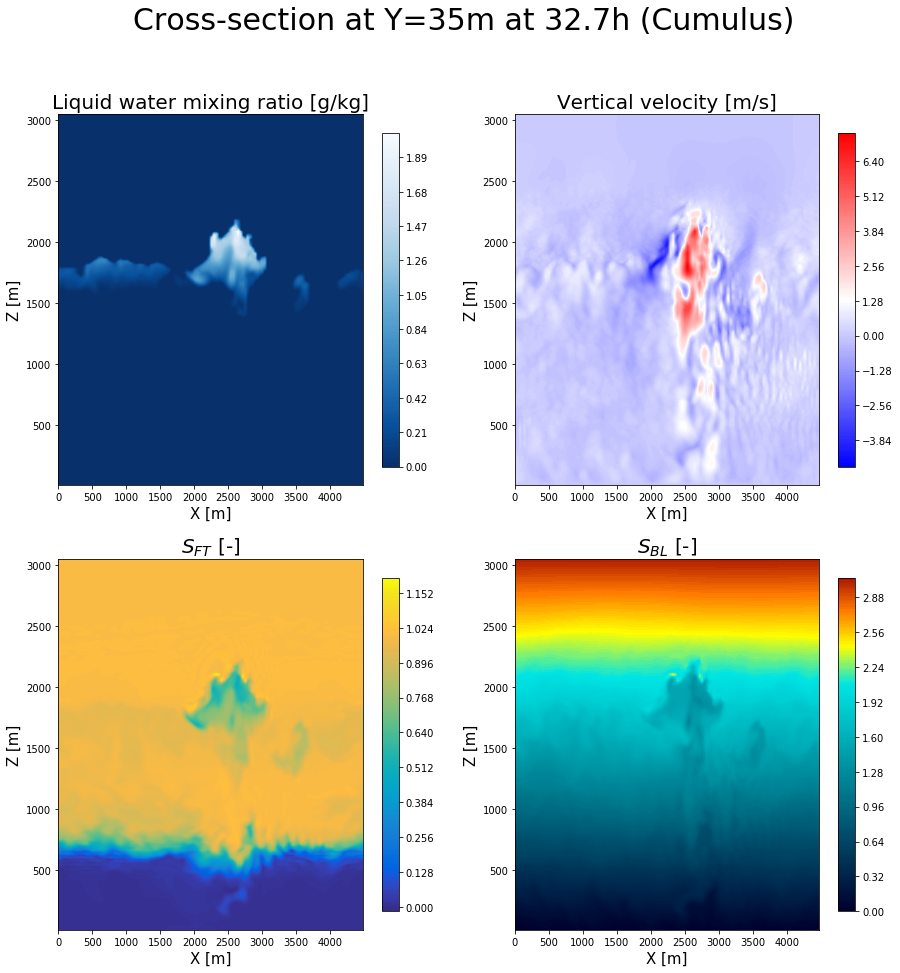

In [391]:
i= 195

## two-layer structure ED-Triple-MF scheme applied.
fig, axs = plt.subplots(2, 2,figsize=(15,15))
fig.suptitle('Cross-section at Y=35m at 32.7h (Cumulus)',fontsize=30)
ax = plt.subplot(221)
cs = plt.contourf(xx,zz,ql[i,:,0,:]*1e3,200,cmap='Blues_r')
plt.title('Liquid water mixing ratio [g/kg]',fontsize=20)
plt.xlabel('X [m]',fontsize=15)
plt.ylabel('Z [m]',fontsize=15)
fig.colorbar(cs, ax=ax, shrink=0.9)

ax = plt.subplot(222)
cs = plt.contourf(xx,zz,w[i,:,0,:],200,cmap='bwr')
plt.title('Vertical velocity [m/s]',fontsize=20)
plt.xlabel('X [m]',fontsize=15)
plt.ylabel('Z [m]',fontsize=15)
fig.colorbar(cs, ax=ax, shrink=0.9)

ax=plt.subplot(223)
cs = plt.contourf(xx,zz,SFT[i,:,0,:],200,cmap=parula_map)
plt.title('$S_{FT}$ [-]',fontsize=20)
plt.xlabel('X [m]',fontsize=15)
plt.ylabel('Z [m]',fontsize=15)
fig.colorbar(cs, ax=ax, shrink=0.9)

ax=plt.subplot(224)
cs = ax.contourf(xx,zz,SBL[i,:,0,:],200, cmap=ssec)
plt.title('$S_{BL}$ [-]',fontsize=20)
plt.xlabel('X [m]',fontsize=15)
plt.ylabel('Z [m]',fontsize=15)
fig.colorbar(cs, ax=ax, shrink=0.9)


plt.savefig('4.eps')

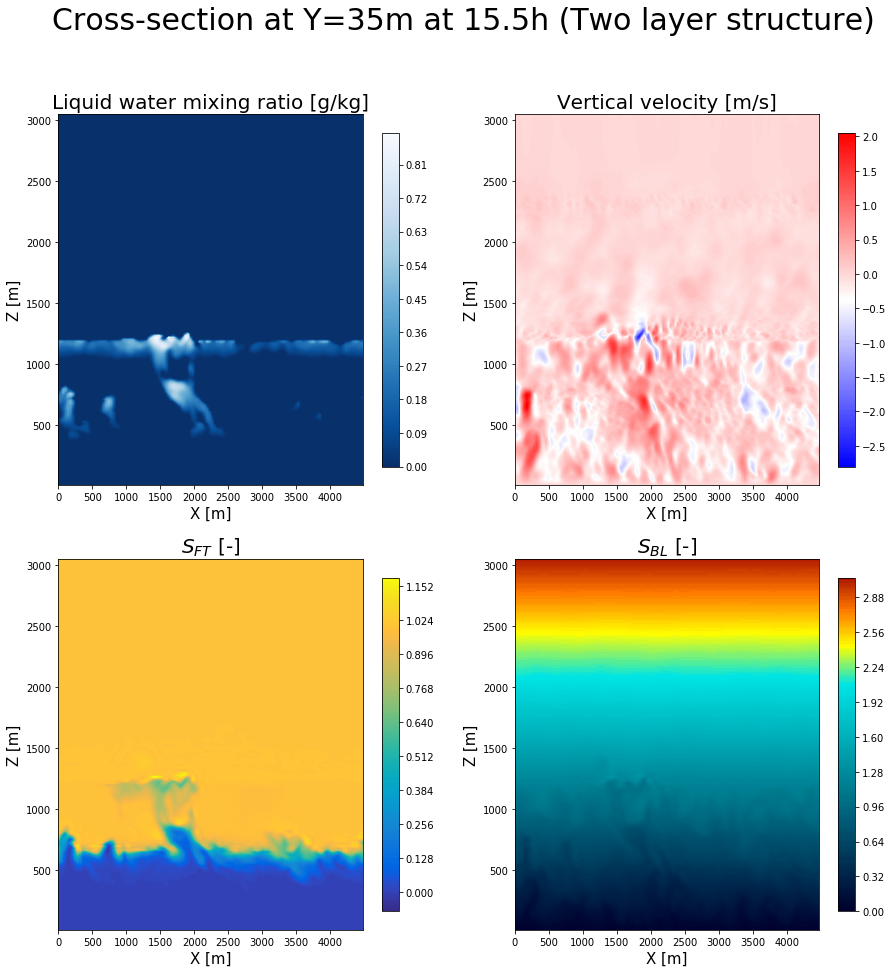

In [390]:
i= 93

## two-layer structure ED-Triple-MF scheme applied.
fig, axs = plt.subplots(2, 2,figsize=(15,15))
fig.suptitle('Cross-section at Y=35m at 15.5h (Two layer structure)',fontsize=30)
ax = plt.subplot(221)
cs = plt.contourf(xx,zz,ql[i,:,0,:]*1e3,200,cmap='Blues_r')
plt.title('Liquid water mixing ratio [g/kg]',fontsize=20)
plt.xlabel('X [m]',fontsize=15)
plt.ylabel('Z [m]',fontsize=15)
fig.colorbar(cs, ax=ax, shrink=0.9)

ax = plt.subplot(222)
cs = plt.contourf(xx,zz,w[i,:,0,:],200,cmap='bwr')
plt.title('Vertical velocity [m/s]',fontsize=20)
plt.xlabel('X [m]',fontsize=15)
plt.ylabel('Z [m]',fontsize=15)
fig.colorbar(cs, ax=ax, shrink=0.9)

ax=plt.subplot(223)
cs = plt.contourf(xx,zz,SFT[i,:,0,:],200,cmap=parula_map)
plt.title('$S_{FT}$ [-]',fontsize=20)
plt.xlabel('X [m]',fontsize=15)
plt.ylabel('Z [m]',fontsize=15)
fig.colorbar(cs, ax=ax, shrink=0.9)

ax=plt.subplot(224)
cs = ax.contourf(xx,zz,SBL[i,:,0,:],200, cmap=ssec)
plt.title('$S_{BL}$ [-]',fontsize=20)
plt.xlabel('X [m]',fontsize=15)
plt.ylabel('Z [m]',fontsize=15)
fig.colorbar(cs, ax=ax, shrink=0.9)


plt.savefig('5.eps')